In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.cluster import AgglomerativeClustering

In [3]:
bank_data = pd.read_excel('Data.xlsx')

In [25]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [26]:
bank_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [4]:
bank_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<AxesSubplot:>

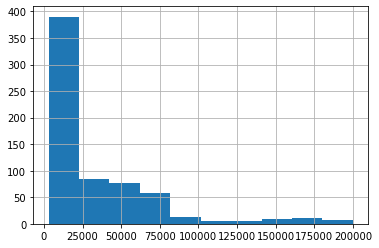

In [7]:
bank_data['Avg_Credit_Limit'].hist()

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='count'>

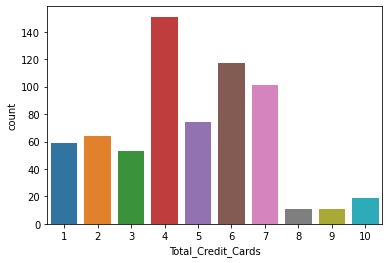

In [9]:
sns.countplot(x = 'Total_Credit_Cards', data = bank_data)

<AxesSubplot:xlabel='Total_visits_bank', ylabel='count'>

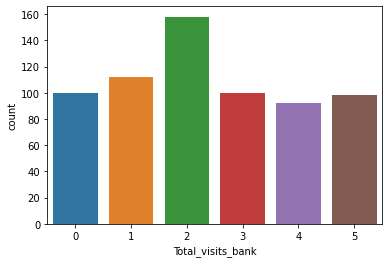

In [10]:
sns.countplot(x = 'Total_visits_bank', data = bank_data)

<AxesSubplot:xlabel='Total_visits_online', ylabel='count'>

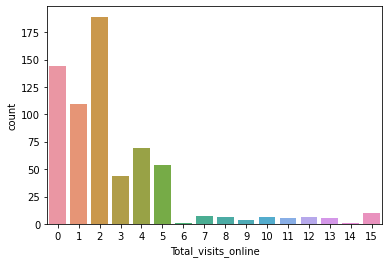

In [11]:
sns.countplot(x = 'Total_visits_online', data = bank_data)

<AxesSubplot:xlabel='Total_calls_made', ylabel='count'>

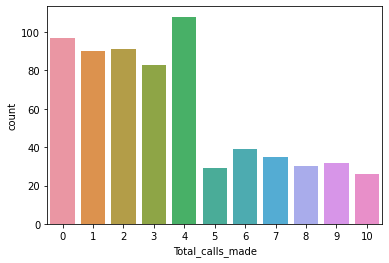

In [12]:
sns.countplot(x = 'Total_calls_made', data = bank_data)

Use PCA to create a 2D version of the features for visualization

In [14]:
scaled_features = MinMaxScaler().fit_transform(bank_data)
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

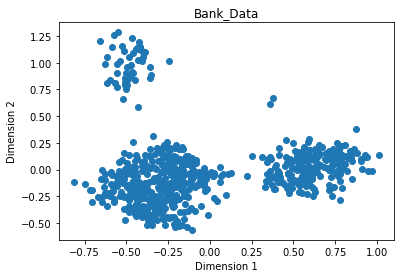

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Bank_Data')
plt.show()

Use WSCC (within cluster sum of square) to define the number of clusters

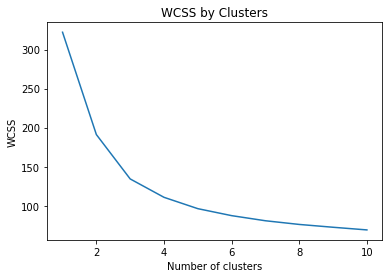

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(scaled_features)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Use Silhouette score for number of clusters

Silhouette score for number of cluster(s) 2: 0.3931477258884434
Silhouette score for number of cluster(s) 3: 0.44268552572929587
Silhouette score for number of cluster(s) 4: 0.33147746965879665
Silhouette score for number of cluster(s) 5: 0.2793625449776161
Silhouette score for number of cluster(s) 6: 0.256256749479937
Silhouette score for number of cluster(s) 7: 0.24574178413102313
Silhouette score for number of cluster(s) 8: 0.23525776803591228
Silhouette score for number of cluster(s) 9: 0.23006214029854316
Silhouette score for number of cluster(s) 10: 0.2172999240135118
Silhouette score for number of cluster(s) 11: 0.21757664498206505


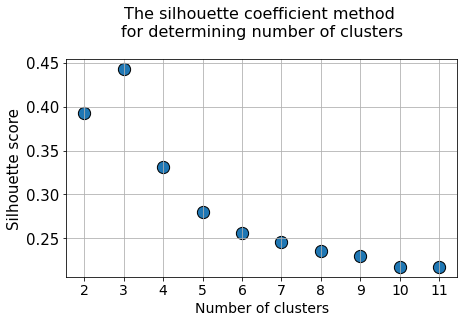

In [43]:
km_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(scaled_features)
    preds = km.predict(scaled_features)
    
    
    silhouette = silhouette_score(scaled_features,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

By using elbow methods, WCSS and Silhouette score, the number of clusters is 3. Try 3 clusters for K-means method.

In [44]:
model = KMeans(n_clusters=3, init='k-means++', n_init=500, max_iter=1500)
km_clusters = model.fit_predict(scaled_features)

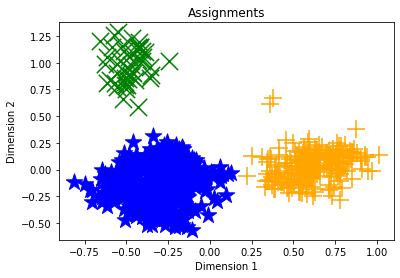

In [45]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=300)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [55]:
km_clusters_df = pd.DataFrame(km_clusters, columns = ['cluster'])
bank_data_km = pd.concat([bank_data,km_clusters_df], axis = 1)
bank_data_km

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1
656,657,60732,84000,10,1,13,2,1
657,658,53834,145000,8,1,9,1,1
658,659,80655,172000,10,1,15,0,1


In [65]:
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

<AxesSubplot:xlabel='cluster', ylabel='Avg_Credit_Limit'>

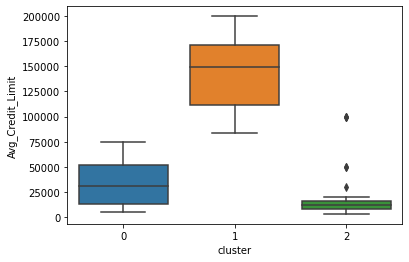

In [58]:
sns.boxplot(x = 'cluster', y = 'Avg_Credit_Limit', data = bank_data_km)

<AxesSubplot:xlabel='cluster', ylabel='Total_Credit_Cards'>

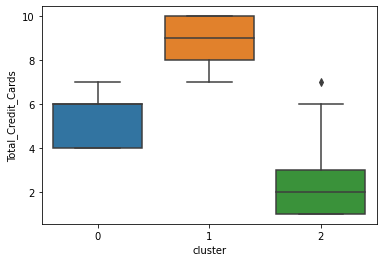

In [60]:
sns.boxplot(x = 'cluster', y = 'Total_Credit_Cards', data = bank_data_km)

<AxesSubplot:xlabel='cluster', ylabel='Total_visits_bank'>

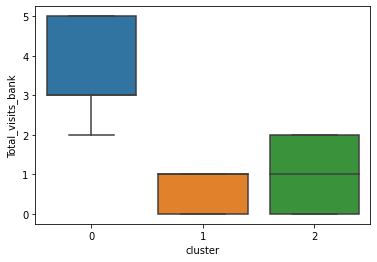

In [67]:
sns.boxplot(x = 'cluster', y = 'Total_visits_bank', data = bank_data_km)

<AxesSubplot:xlabel='cluster', ylabel='Total_visits_online'>

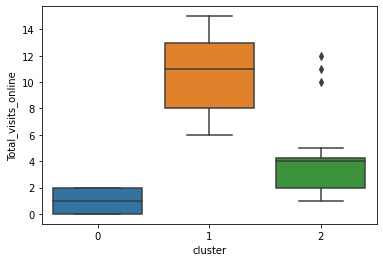

In [64]:
sns.boxplot(x = 'cluster', y = 'Total_visits_online', data = bank_data_km)

<AxesSubplot:xlabel='cluster', ylabel='Total_calls_made'>

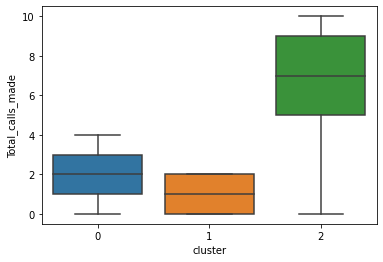

In [66]:
sns.boxplot(x = 'cluster', y = 'Total_calls_made', data = bank_data_km)

There are three clusters by K-means clustering.

People in blue group have the highest total visits to bank and the lowest total visits online.
People in orange group have the highest credit limits and total credit cards, they also visits online bank most and they have the lowest visits to bank and calls to bank.
People in green group have the lowest credit limits and number of total credit cards, and they made the most phone calls to the bank.

Based on that, for people in blue group or people predicted in blue group, bank could provide specific and better in-person services. And because these person have the lowest number of visitors online, they may be the elders that are not familiar with digital technology or online services, bank could provide customized services such as guidance to online banking or priority seats for elder people.
For people in orange group, bank could provide them with special personal loan or customized credit card because they may have larger needs in purchasing and they may be capable of consumption.
For people in green group, bank could provide them personalized services like student loan. Because these people have the lowest credit limits and number of credit cards, they may be students and people with lower income. So bank could provide them with special loan or other services.

Use hierarchical clustering (AgglomerativeClustering) to create segments

In [79]:
# clustering = AgglomerativeClustering().fit(scaled_features)
# agg_model = AgglomerativeClustering(n_clusters=3)
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(scaled_features)

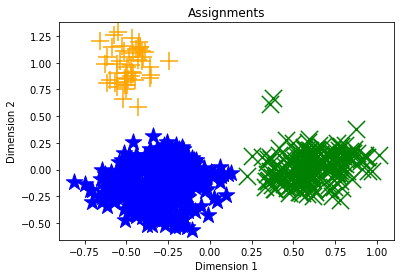

In [80]:
plot_clusters(features_2d, agg_clusters)

In [81]:
agg_clusters_df = pd.DataFrame(agg_clusters, columns = ['cluster'])

In [82]:
bank_data_hc = pd.concat([bank_data,agg_clusters_df], axis = 1)
bank_data_hc

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,1
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,2
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


<AxesSubplot:xlabel='cluster', ylabel='Avg_Credit_Limit'>

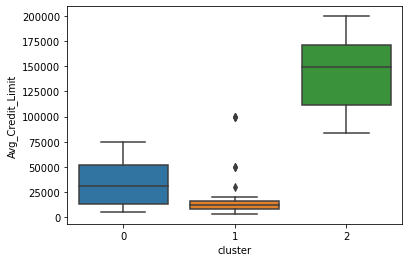

In [87]:
sns.boxplot(x = 'cluster', y = 'Avg_Credit_Limit', data = bank_data_hc)

<AxesSubplot:xlabel='cluster', ylabel='Total_Credit_Cards'>

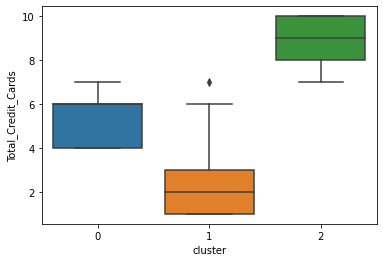

In [88]:
sns.boxplot(x = 'cluster', y = 'Total_Credit_Cards', data = bank_data_hc)

<AxesSubplot:xlabel='cluster', ylabel='Total_visits_bank'>

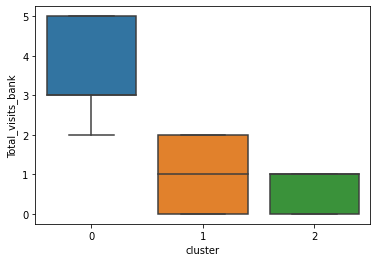

In [89]:
sns.boxplot(x = 'cluster', y = 'Total_visits_bank', data = bank_data_hc)

<AxesSubplot:xlabel='cluster', ylabel='Total_visits_online'>

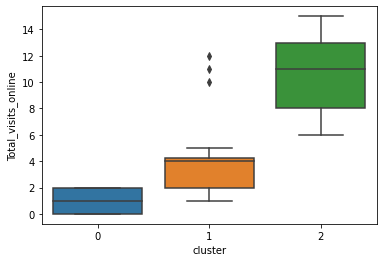

In [90]:
sns.boxplot(x = 'cluster', y = 'Total_visits_online', data = bank_data_hc)

<AxesSubplot:xlabel='cluster', ylabel='Total_calls_made'>

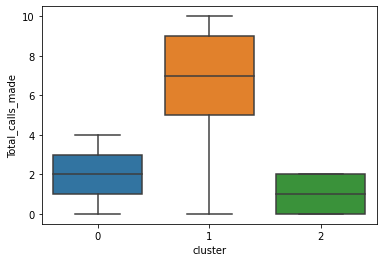

In [92]:
sns.boxplot(x = 'cluster', y = 'Total_calls_made', data = bank_data_hc)

In [100]:
km_silhouette_score = silhouette_score(scaled_features,km_clusters)
hc_silhouette_score = silhouette_score(scaled_features,agg_clusters)
print("silhouette score for K-means:", km_silhouette_score)
print("silhouette score for hierarchical clustering",hc_silhouette_score)

silhouette score for K-means: 0.44268552572929587
silhouette score for hierarchical clustering 0.44268552572929587


The two methods do not have big differences for the project. There are also three groups by using hierarchical cluste method. And the three groups are approximately same as the groups by using K-means methods.

So the recommendations are the same as the recommendations by K-means clustering methods.